# Pizzaïo’jo

## 1. Importation de Pandas et des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_excel('Pizza.xlsx')

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## 2. Informations de base

In [4]:
nb_pizza_unique=df['pizza_id'].value_counts().shape[0]
print("Le nombre de pizza différentes est de :",nb_pizza_unique)

Le nombre de pizza différentes est de : 91


In [5]:
nb_commande=df['order_id'].value_counts().shape[0]
print("Le nombre de commandes de pizza sur l'année est de :",nb_commande)

Le nombre de commandes de pizza sur l'année est de : 21350


## 3. Analyse temporelle

In [6]:
duree_acquisition_donne=(df['order_date'].max()-df['order_date'].min()).days
print("Le nombre de jour qui sépare la première commande de la dernière est de",duree_acquisition_donne,"jour(s)")

Le nombre de jour qui sépare la première commande de la dernière est de 364 jour(s)


In [7]:
nb_jour_travail=df['order_date'].value_counts().shape[0]
print("Le nombre de jour comprenant des commandes est de",nb_jour_travail,"jour(s)")

Le nombre de jour comprenant des commandes est de 358 jour(s)


In [8]:
nb_moy_pizza_parjour=round(nb_commande/nb_jour_travail,2)
print("Il y a eu en moyenne",nb_moy_pizza_parjour,"commandes /jours")

Il y a eu en moyenne 59.64 commandes /jours


on remarque que c'est à midi qu'il est dans le rush donc peu/pas de temps d'attente entre 2 pizzas, ici on parle en nombre de pizza pas en nombre de commandes et je fais l'hypothese qu'il réalise les pizzas dans l'heures de la commande sans accepter plus de pizza qu'il ne peut en sortir

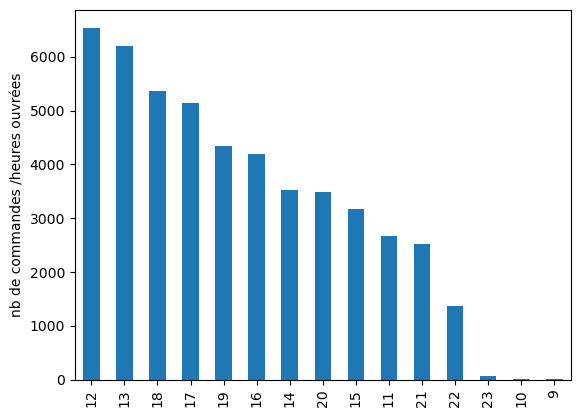

La durée moyenne pour traité une commande en période de rush est de : 3.28 minutes


In [9]:
df['Hour']=df.apply(lambda x:x['order_time'].hour, axis=1)

fig,ax = plt.subplots()
df['Hour'].value_counts().plot(ax = ax, kind = 'bar', ylabel = 'nb de commandes /heures ouvrées')
plt.show()

nb_commande_a_midi=df.loc[df['Hour'] == 12].shape[0]
temps_moy_parcommande_minutes=round(60*(nb_jour_travail)/nb_commande_a_midi,2)

print("La durée moyenne pour traité une commande en période de rush est de :",temps_moy_parcommande_minutes,"minutes")

## 4. Analyse de la quantité

In [10]:
nb_pizza=df.shape[0]
nb_pizza_par_commandes=round(nb_pizza/nb_commande,2)
print("En moyenne il y a",nb_pizza_par_commandes,"pizzas par commandes")

En moyenne il y a 2.28 pizzas par commandes


In [11]:
taille_plus_courante=df['pizza_size'].mode()[0]
print("La taille de pizza la plus couramment commandée est",taille_plus_courante)

La taille de pizza la plus couramment commandée est L


In [12]:
categorie_plus_courante=df['pizza_category'].mode()[0]
print("La categorie de pizza la plus couramment commandée est",categorie_plus_courante)

La categorie de pizza la plus couramment commandée est Classic


In [13]:
try :
    dict=df["pizza_name"].value_counts().index
    carte_pizza=[]
    for i in dict:
        temp=df['unit_price'].loc[(df['pizza_name'] == i) & (df['pizza_size'] == 'S')].iloc[0]
        carte_pizza.append([i,temp])
except:
    print("Impossible veuillez lire le commentaire de la cellule")

    #objectif de cette cellule : calculer le prix moyen de la carte de la pizzeria independament des quantités de pizzas commandées
    #mais c'est impossible car aucune taille n'est commune à toute les pizzas

Impossible veuillez lire le commentaire de la cellule


## 5. Analyse des prix

In [14]:
prix_moyen_pizza=round(df['unit_price'].sum(axis=0)/nb_pizza,2)
print("Le prix moyen d'une pizza est de",prix_moyen_pizza,"€")

Le prix moyen d'une pizza est de 16.49 €


In [15]:
prix_moyen_commande=round(df['unit_price'].sum(axis=0)/nb_commande,2)
print("Le prix moyen d'une commande est de",prix_moyen_commande,"€")

Le prix moyen d'une commande est de 37.56 €


In [16]:
pizza_chere=df.sort_values(['unit_price'], ascending=[False]).iat[0,11]
pizza_chere_prix=df.sort_values(['unit_price'], ascending=[False]).iat[0,6]
print("La pizza la plus chère est la :",pizza_chere,"et coute",pizza_chere_prix,"€")

La pizza la plus chère est la : The Greek Pizza et coute 35.95 €


## 6. Répartition par taille et catégorie

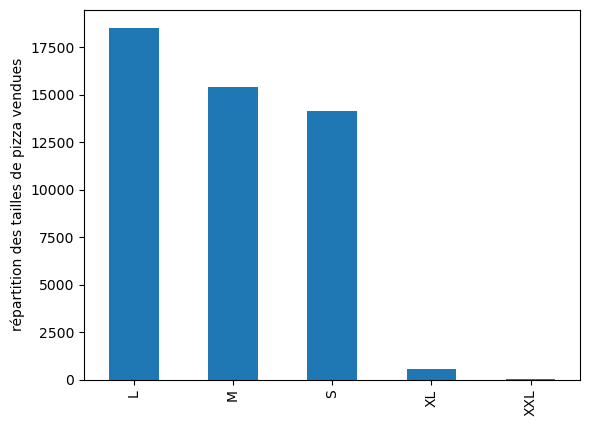

In [17]:
fig,ax = plt.subplots()
df['pizza_size'].value_counts().plot(ax = ax, kind = 'bar', ylabel = 'répartition des tailles de pizza vendues')
plt.show()

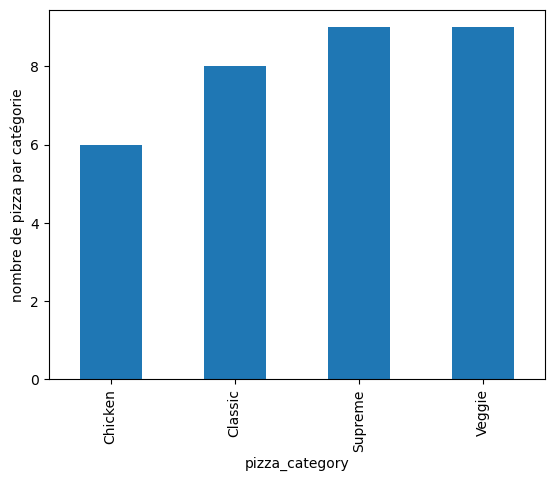

In [18]:
fig,ax = plt.subplots()
df.groupby('pizza_category')['pizza_name'].nunique().plot(ax = ax, kind = 'bar', ylabel = 'nombre de pizza par catégorie')
plt.show()

## 7. Analyse des ingrédients

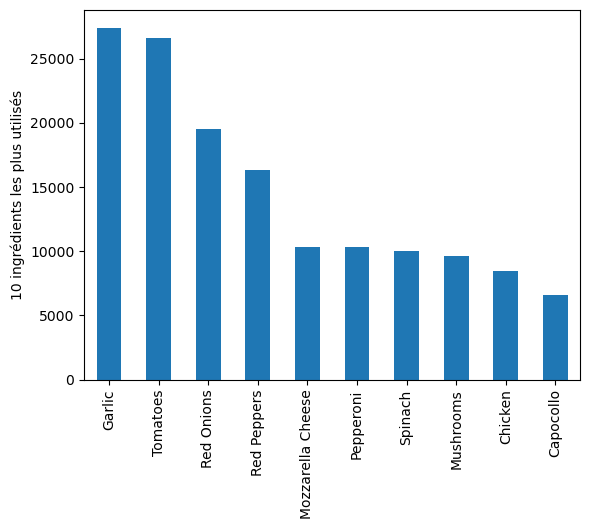

In [19]:
df['Ingredient']=df.apply(lambda x:x['pizza_ingredients'].split(", "), axis=1)
fig,ax = plt.subplots()
pd.DataFrame(df.Ingredient.values.tolist()).stack().value_counts()[:10].plot(ax = ax, kind = 'bar', ylabel = '10 ingrédients les plus utilisés')
plt.show()

Cette requete est orienté pour l'utilité du gérant et non des clients afin qu'il puisse estimer sa consommation d'ingrédient sur une année et pourquoi pas négocier ses prix d'achat par rapport au volume.

In [20]:
ingredient='Chicken'
nb_pizza_ingredient=df.pizza_ingredients.str.contains(ingredient, case=False).sum()
print("Il y a",nb_pizza_ingredient,"pizza qui contiennent l'ingrédient suivant :",ingredient)

Il y a 10815 pizza qui contiennent l'ingrédient suivant : Chicken


## 8. Détails de la commande

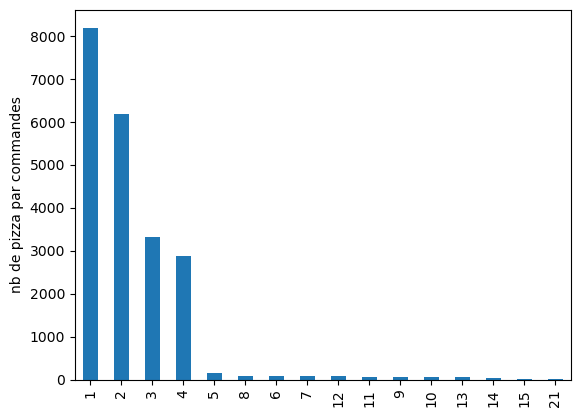

In [21]:
fig,ax = plt.subplots()
df.groupby('order_id').count().order_details_id.value_counts().plot(ax = ax, kind = 'bar', ylabel = 'nb de pizza par commandes')
plt.show()

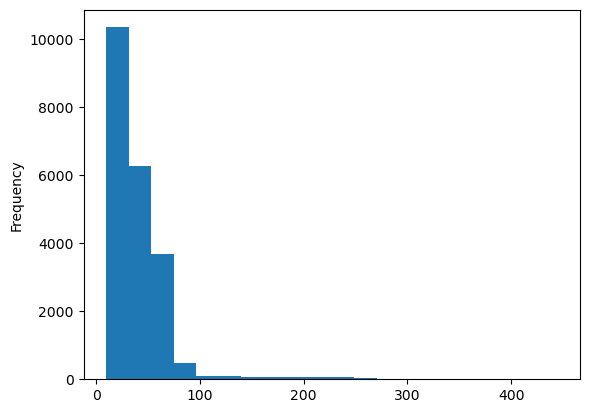

L'axe des x représente le prix total d'une commande
On observe que presque la totalité de ses commandes est en dessous de 100€


In [22]:
fig,ax = plt.subplots()
df.groupby("order_id").total_price.sum().plot(kind = 'hist', bins=20)
plt.show()
print("L'axe des x représente le prix total d'une commande")
print("On observe que presque la totalité de ses commandes est en dessous de 100€")

## 9. Analyse du chiffre d’affaires en fonction du temps

In [23]:
ca_quotidien=df.total_price.sum()/nb_jour_travail
print("Le CA quotidien est de :",ca_quotidien,"€")
print("Ce chiffre me parait très elevé après le prix de ses pizzas l'est tout aussi donc difficile de conclure")

Le CA quotidien est de : 2284.525279329609 €
Ce chiffre me parait très elevé après le prix de ses pizzas l'est tout aussi donc difficile de conclure


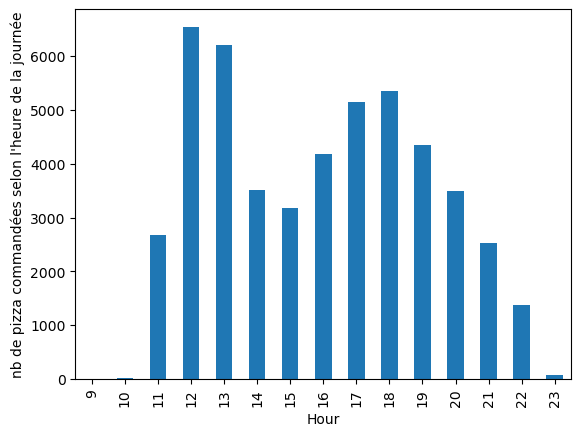

On observe bien que le CA est en lien avec l'heure de la journée, ce qui semble logique dans le monde de la restauration
Selon moi on observe une première loi normale centrée à 12h avec un petit sigma et une seconde loi normale centrée à 18h avec un sigma plus grand


In [24]:
fig,ax = plt.subplots()
df.groupby("Hour").order_id.count().plot(ax = ax, kind = 'bar', ylabel = "nb de pizza commandées selon l'heure de la journée")
plt.show()
print("On observe bien que le CA est en lien avec l'heure de la journée, ce qui semble logique dans le monde de la restauration")
print("Selon moi on observe une première loi normale centrée à 12h avec un petit sigma et une seconde loi normale centrée à 18h avec un sigma plus grand")

## 10.Pizzas populaires

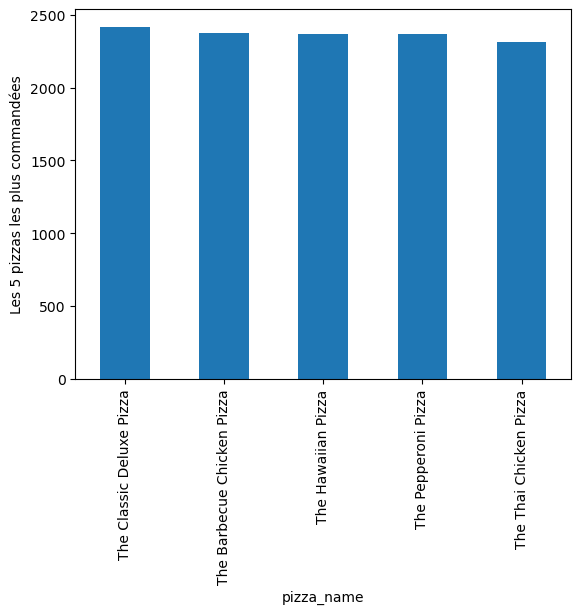

In [25]:
fig,ax = plt.subplots()
df.groupby("pizza_name").order_details_id.count().sort_values(ascending=False)[:5].plot(ax = ax, kind = 'bar', ylabel = "Les 5 pizzas les plus commandées")
plt.show()

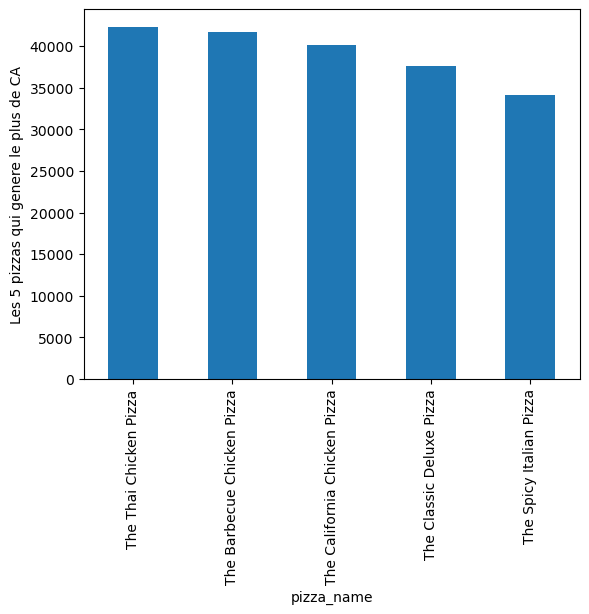

In [26]:
fig,ax = plt.subplots()
df.groupby("pizza_name").unit_price.sum().sort_values(ascending=False)[:5].plot(ax = ax, kind = 'bar', ylabel = "Les 5 pizzas qui genere le plus de CA")
plt.show()

## 11.Chiffre d'affaires par taille et catégorie

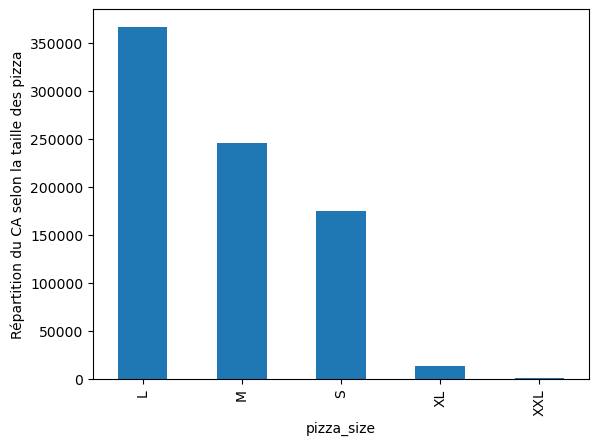

In [27]:
fig,ax = plt.subplots()
df.groupby("pizza_size").unit_price.sum().sort_values(ascending=False).plot(ax = ax, kind = 'bar', ylabel = "Répartition du CA selon la taille des pizza")
plt.show()

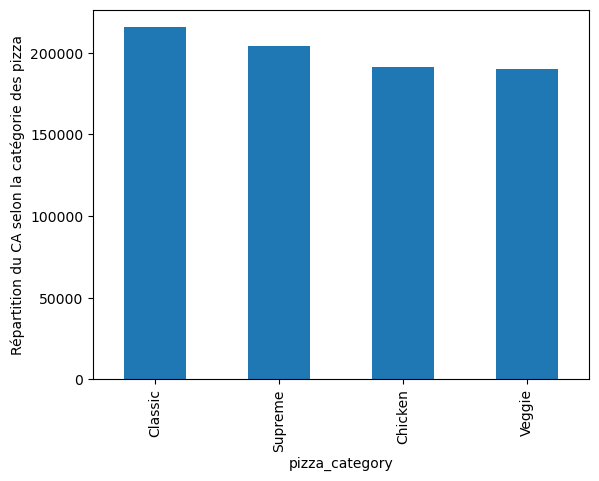

In [28]:
fig,ax = plt.subplots()
df.groupby("pizza_category").unit_price.sum().sort_values(ascending=False).plot(ax = ax, kind = 'bar', ylabel = "Répartition du CA selon la catégorie des pizza")
plt.show()

## 12.Corrélation entre prix et quantité

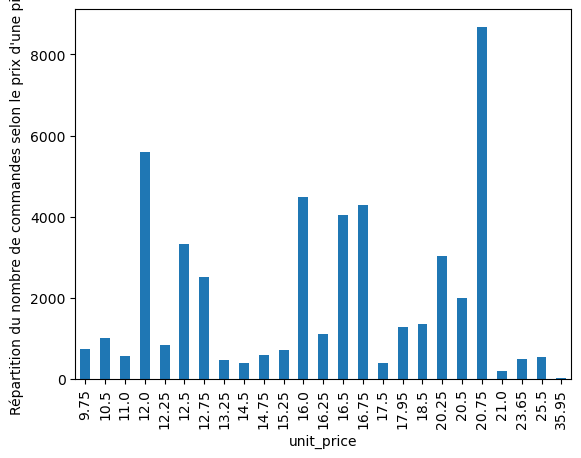

Il ne semble pas y avoir de correlation avéré


In [29]:
fig,ax = plt.subplots()
df.groupby("unit_price").count().order_details_id.plot(ax = ax, kind = 'bar', ylabel = "Répartition du nombre de commandes selon le prix d'une pizza")
plt.show()
print("Il ne semble pas y avoir de correlation avéré")

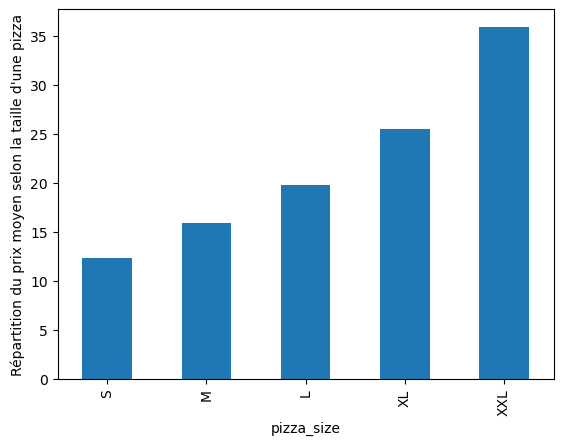

In [30]:
fig,ax = plt.subplots()
df.groupby("pizza_size").unit_price.mean().sort_values().plot(ax = ax, kind = 'bar', ylabel = "Répartition du prix moyen selon la taille d'une pizza")
plt.show()

## 13.Tendances saisonnières

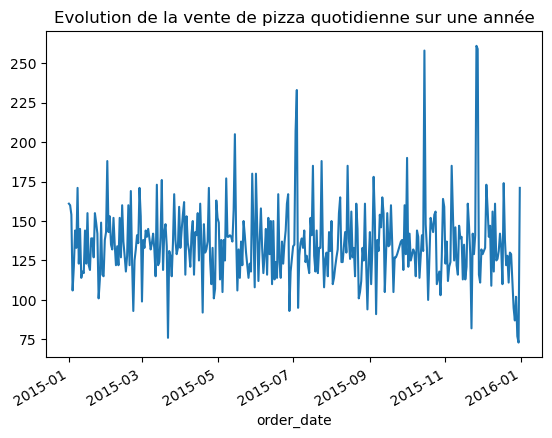

In [31]:
fig,ax = plt.subplots()
df.groupby("order_date").count().order_id.plot(ax = ax, kind = 'line', title = "Evolution de la vente de pizza quotidienne sur une année")
plt.show()

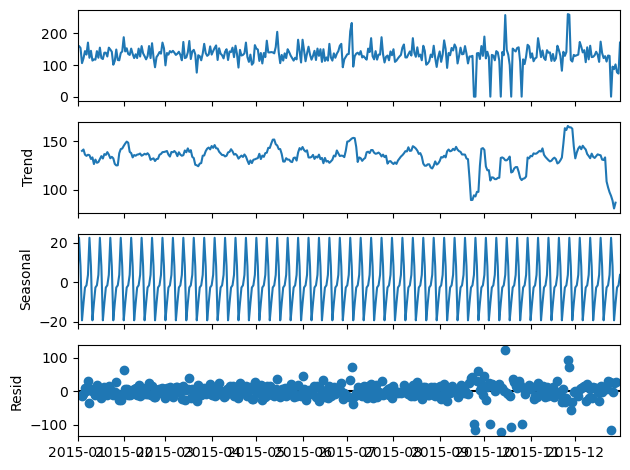

On a bien un residu qui est similaire à un bruit blanc ou avec des valeurs aléatoire donc le fait qu'il s'agisse d'un modèle additif est validé
La saisonalité correspond à une saisonalité d'une semaine
Le commerçant peut identifier ses saisons où il fonctionne mieux que d'autre avec le graphe 'trend'


In [32]:
dt=df.groupby("order_date").count().order_id.to_frame()
dt = dt.asfreq('d')
dt.fillna(0, inplace=True)


res = seasonal_decompose(dt, model='additive')
res.plot()
plt.show()
print("On a bien un residu qui est similaire à un bruit blanc ou avec des valeurs aléatoire donc le fait qu'il s'agisse d'un modèle additif est validé")
print("La saisonalité correspond à une saisonalité d'une semaine")
print("Le commerçant peut identifier ses saisons où il fonctionne mieux que d'autre avec le graphe 'trend'")

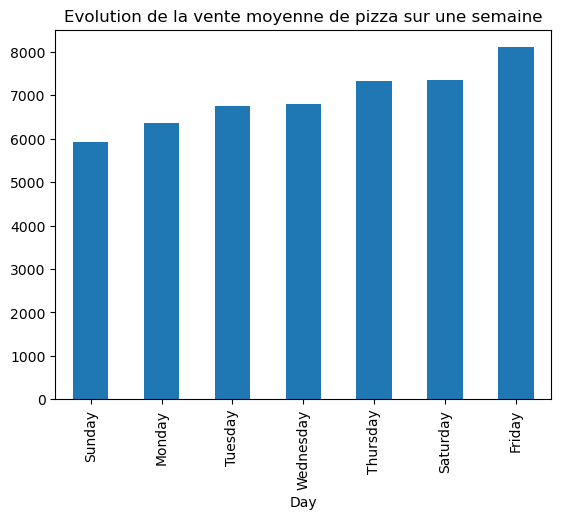

Il y a correlation entre les jours de la semaine et la quantité de commandes effectué, seul le samedi fait exeption a une corélation purement linéaire


In [33]:
df['Day'] = df['order_date'].dt.day_name()
fig,ax = plt.subplots()
df.groupby("Day").count().order_id.sort_values().plot(ax = ax, kind = 'bar', title = "Evolution de la vente moyenne de pizza sur une semaine")
plt.show()
print("Il y a correlation entre les jours de la semaine et la quantité de commandes effectué, seul le samedi fait exeption a une corélation purement linéaire")